# Example 10.1: Ideal Rankine Cycle

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet pressure of 3 MPa, a condenser pressure of 15 kPa, and no superheat in the boiler.  For reversible work devices and $\dot{W}_\text{Net}=1\ \mathrm{MW}$ Find:
* (a) Mass flow rate of steam (kg/s)
* (b) Boiler heat transfer (MW)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle
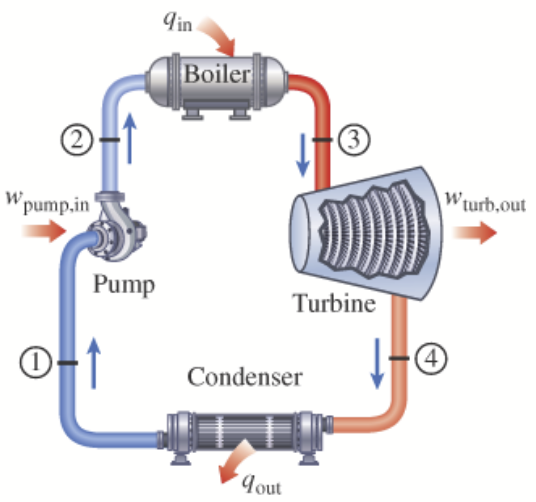

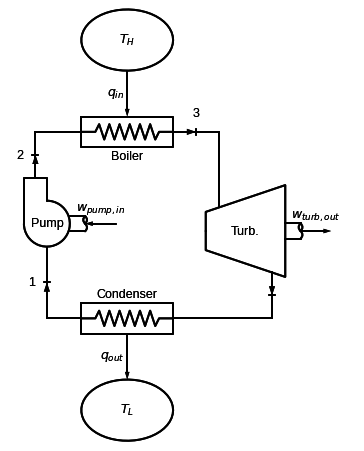

In [17]:
#import schematics # <- uncomment to regenerate schematic
#schematics.rankine(file='Figures/Rankine.png'); # <- uncomment to regenerate schematic
from IPython.display import Image
Image('Figures/Rankine.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074259&node=10465190&a=57963229&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [6]:
from kilojoule.templates.kSI import *
   
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [7]:
p[3] = Quantity(3,'MPa')           # Turbine inlet pressure
p[1] = p[4] = Quantity(15.0,'kPa') # condenser pressure
Wdot_net = Quantity(1,'MW')        # Net power 

Summary();

### Assumptions
- Ideal work devices
- No superheat: saturated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [8]:
x[3] = 1      # No superheat
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger

Summary();

The `states.fix(state_name, property_table)` command will use information stored in the `state_name` row of the `states` table to try to fill in the rest of the row using the `property_table`.  For instance, from the given parameters, we already have two independent, intensive properties for state $1$, $T_1$ and $x_1$.  We could evaluate each of the remaining properties at this state by calling each of the available functions from the `water` table one at a time with `T[1]` and `x[1]`, or we can use the `.fix()` method to automate this process as shown below.

In [9]:
states.fix(1,water)
Summary();

#### (a) Mass flow rate

In [10]:
%%showcalc
"### State 1)"
states.fix(1,water) # hide

"### 1-2) Isentropic compression"
s[2] = s[1]

states.fix(2,water) # hide
w_1_to_2 = h[1]-h[2]

"### 2-3) Isobaric heat addition"
states.fix(3,water) # hide

"### 3-4) Isentropic expansion"
s[4] = s[3]
states.fix(4,water) # hide
w_3_to_4 = h[3]-h[4]

"### Mass flow rate"
w_net = w_1_to_2 + w_3_to_4
mdot = (Wdot_net/w_net).to('kg/s')

### State 1)
Fixing state 1 using previously defined values.
### 1-2) Isentropic compression
\begin{align}
  {s}_{ 2 } &=  {s}_{ 1 }  = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 2 using previously defined values.
\begin{align}
  w_{1\to{}2} &=   {h}_{ 1 } - {h}_{ 2 }  \\
    &=  225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -3.025\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### 2-3) Isobaric heat addition
Fixing state 3 using previously defined values.
### 3-4) Isentropic expansion
\begin{align}
  {s}_{ 4 } &=  {s}_{ 3 }  = 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 4 using previously defined values.
\begin{align}
  w_{3\to{}4} &=   {h}_{ 3 } - {h}_{ 4 }  \\
    &=  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2002.4\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 800.72\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### Mass flow rate
\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} \\
    &= -3.025\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 800.72\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 797.69\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{m} &=  \frac{ \dot{W}_{net} }{ w_{net} } \\
    &= \frac{ 1\ \mathrm{MW} }{ 797.69\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 1.2536\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}



In [12]:
Summary(show=True);

<IPython.core.display.Latex object>

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [kJ/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$phase$ [],$c_{v}$ [kJ/K/kg],$c_{p}$ [kJ/K/kg]
1,327.119313,15.0,0.001014,225.929071,225.944282,0.754865,0,twophase,4.006911,4.182787
2,327.234027,3000.0,0.001013,225.930994,228.969291,0.754865,N/A,liquid,3.999060,4.176120
3,507.003107,3000.0,0.066664,2603.160012,2803.153097,6.185583,1,twophase,2.328248,3.611915
4,327.119313,15.0,7.503663,1889.882282,2002.437223,6.185583,0.748836,twophase,1.504793,1.996365


#### (b) Boiler heat transfer (MW)

In [13]:
%%showcalc
"### Boiler First Law"
q_2_to_3 = h[3]-h[2]
Qdot_in = mdot*q_2_to_3

### Boiler First Law
\begin{align}
  q_{2\to{}3} &=   {h}_{ 3 } - {h}_{ 2 }  \\
    &=  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 2574.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{Q}_{in} &=   \dot{m}  \cdot  q_{2\to{}3}  \\
    &=  1.2536\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  2574.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 3227.0\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



#### (c) Thermal efficiency

In [14]:
%%showcalc
eta_th = (Wdot_net/Qdot_in).to('')

\begin{align}
  \eta_{th} &=  \frac{ \dot{W}_{net} }{ \dot{Q}_{in} } \\
    &= \frac{ 1\ \mathrm{MW} }{ 3227.0\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 0.30988
\end{align}



#### (d) Diagrams

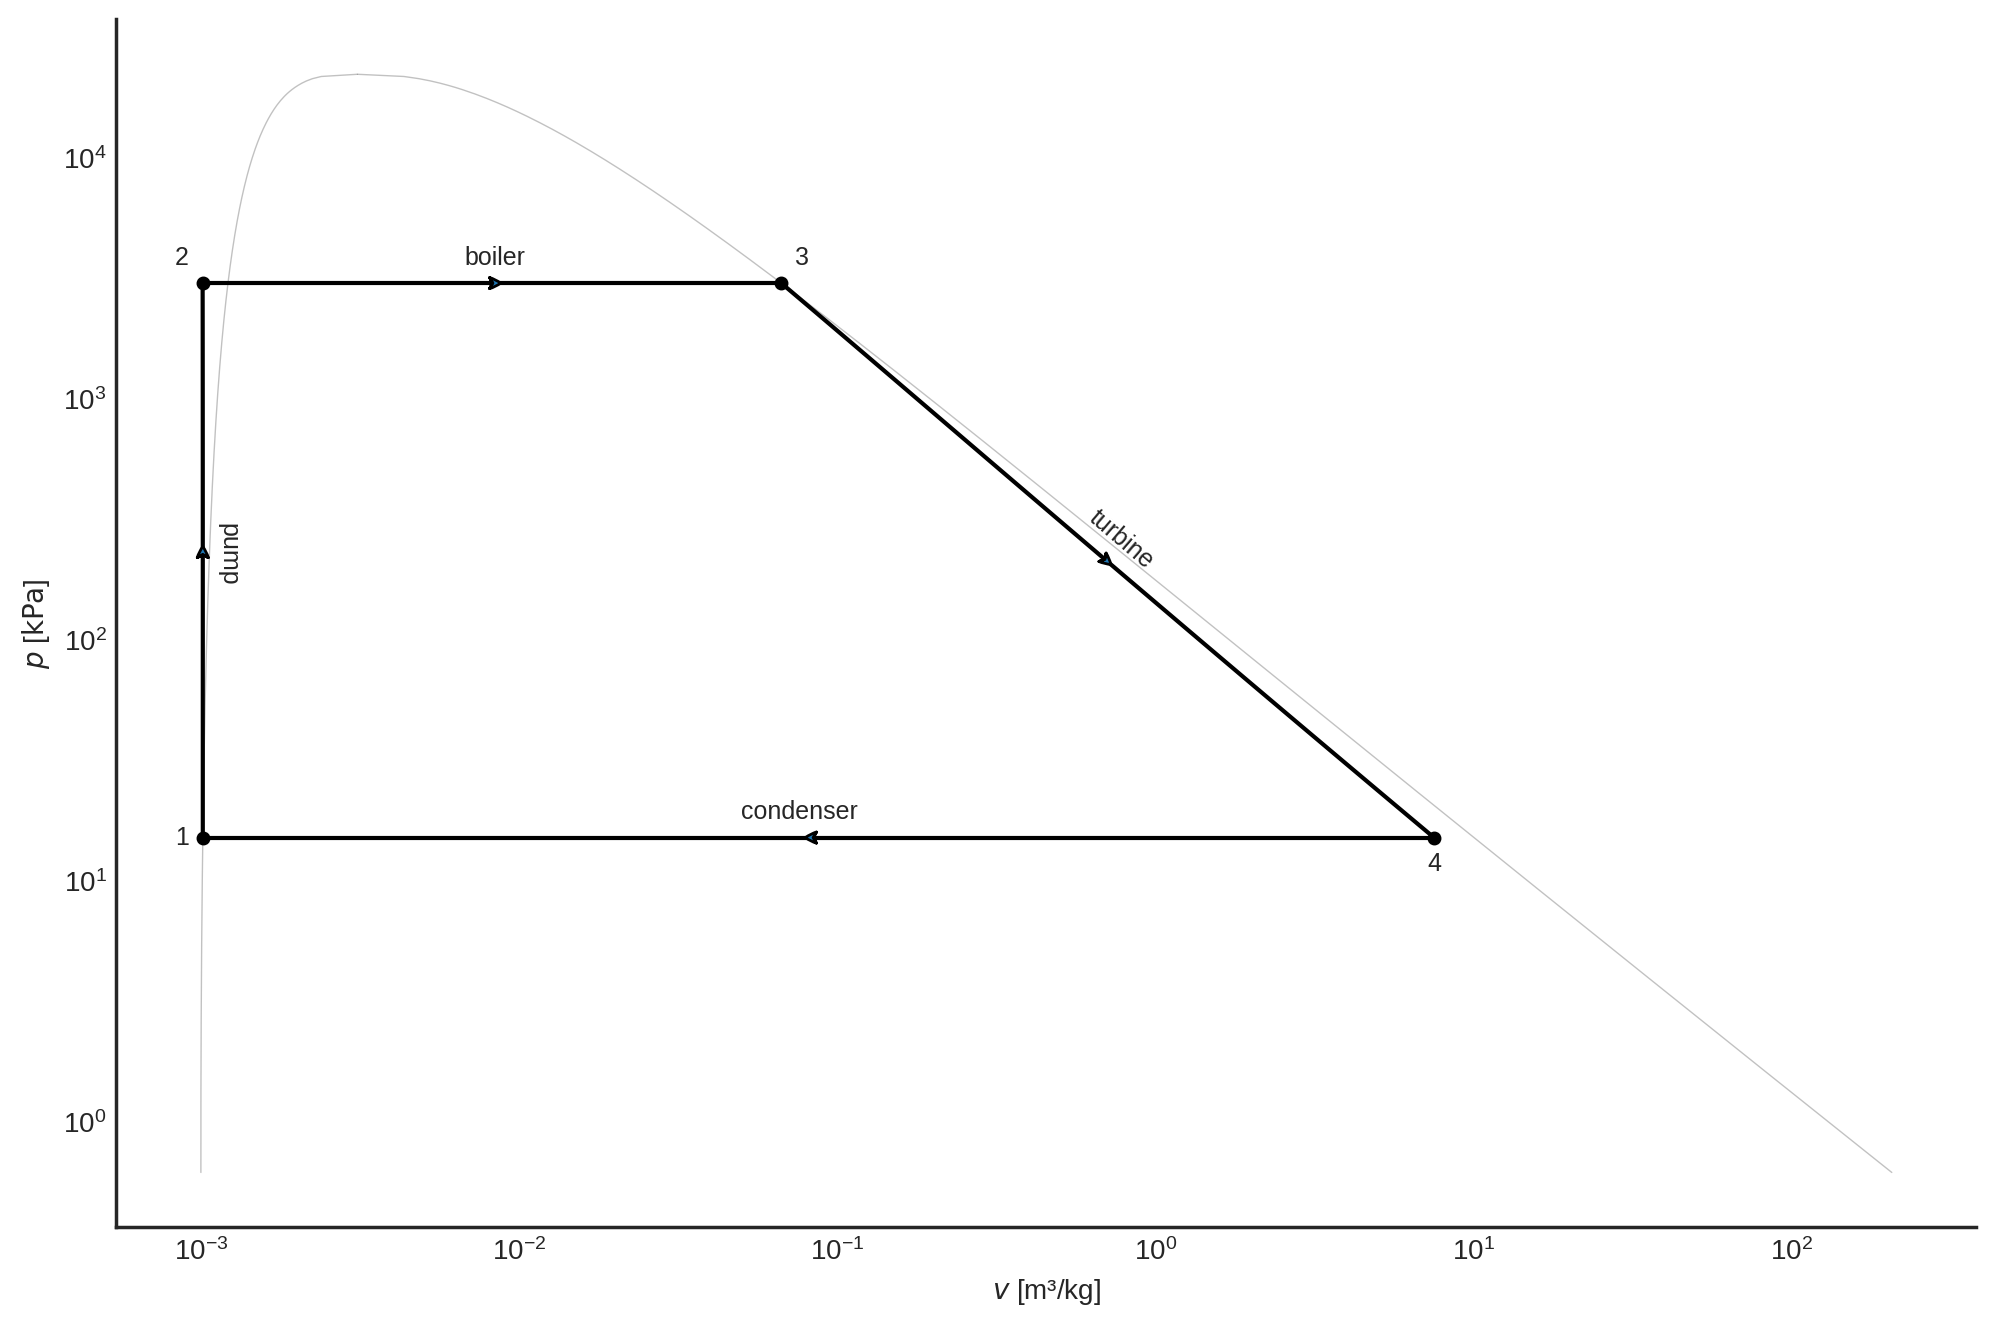

In [15]:
pv = water.pv_diagram()

for state in [1,2,3,4]:
    v[state] = water.v(p[state],h=h[state])

pv.plot_state(states[1],label_loc='west')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='north east')
pv.plot_state(states[4],label_loc='south')

pv.plot_process(states[1],states[2],path='isentropic',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='isentropic',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric',label='condenser');

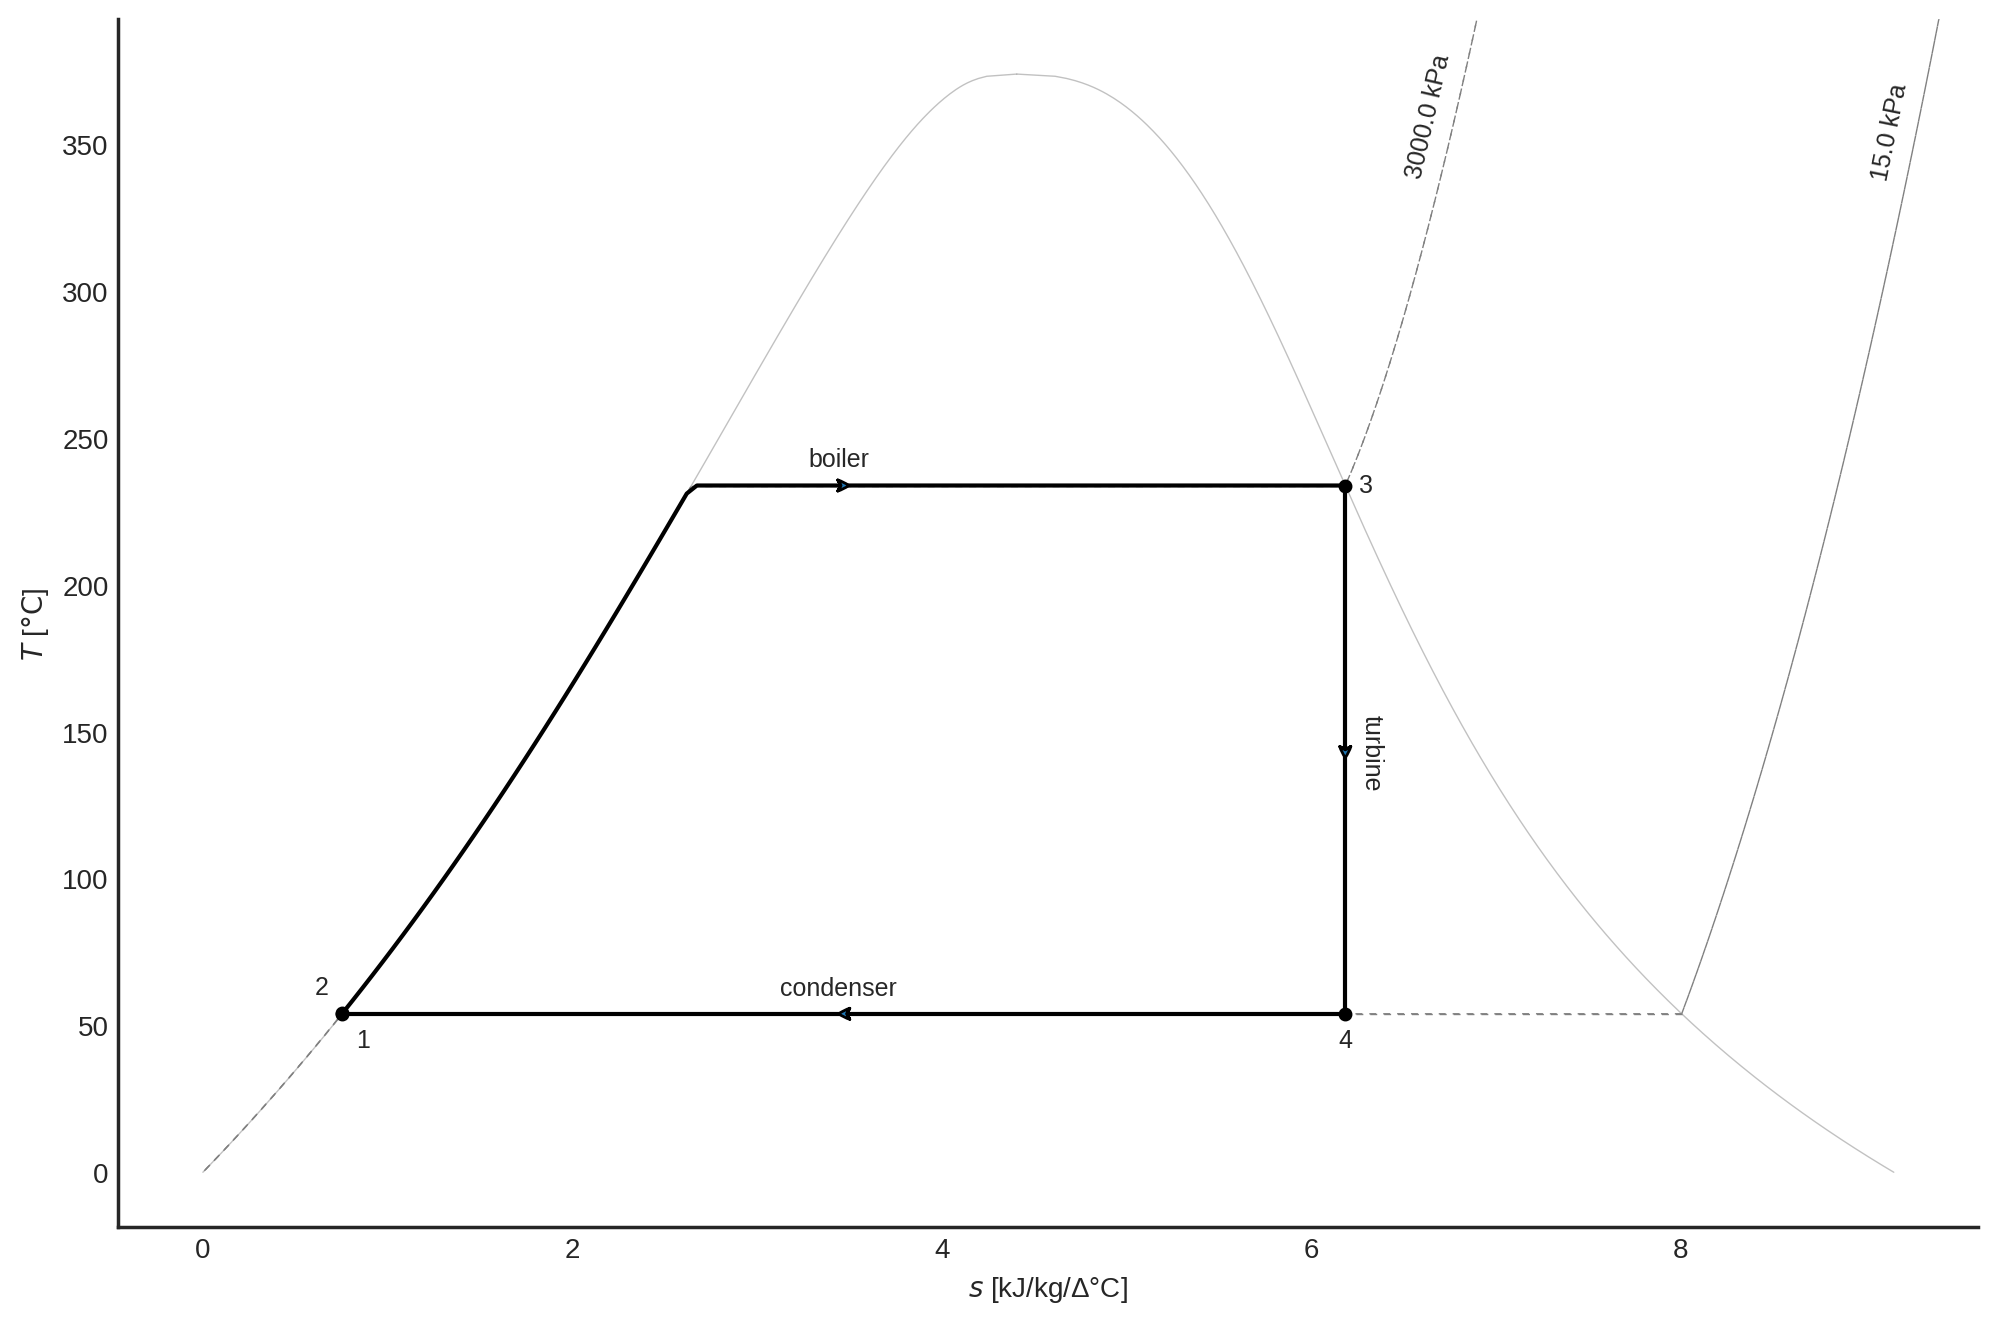

In [16]:
Ts = water.Ts_diagram()
Ts.plot_isobar(p[3],label=f'{p[3]}',pos=.9)
Ts.plot_isobar(p[4],label=f'{p[4]}',pos=.9)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='south')
    
Ts.plot_process(states[1],states[2],path='isentropic',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='isentropic',label='turbine')
Ts.plot_process(states[4],states[1],path='isobaric',label='condenser');

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

#!jupyter nbconvert --to html_embed --no-input --no-prompt 'Ex10.1 Ideal Rankine Cycle.ipynb'